# Problem Statement :

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

# Business Goal :

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

Recommend strategies to manage customer churn based on your observations.


Submitted By: Puspanjali Sarma

Batch: ML- C43

Institute: Post Graduate Diploma in Machine Learning and AI - IIIT, Bangalore


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [ ]:
# Reading the dataset
df = pd.read_csv('train.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

## Handling missing values

#### Handling missing values in columns

In [ ]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

In [ ]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [ ]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [ ]:
df.shape

##### Deleting the date columns as the date columns are not required in our analysis

In [ ]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

In [ ]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [ ]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [ ]:
df.shape

### Filter high-value customers

Creating column `avg_rech_amt_6_7` by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [ ]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [ ]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

Filter the customers, who have recharged more than or equal to X.

In [ ]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

In [ ]:
df.shape

We can see that we have around ***~21K*** rows after filtering

#### Handling missing values in rows

In [ ]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

In [ ]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

In [ ]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

In [ ]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [ ]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

In [ ]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

In [ ]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [ ]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [ ]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

In [ ]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

In [ ]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [ ]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [ ]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

In [ ]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

In [ ]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [ ]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

We can see there are no more missing values in any columns.

In [ ]:
df.shape

In [ ]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

#### Checking churn percentage

In [ ]:
round(100*(df['churn_probability'].mean()),2)

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [ ]:
df['churn_probability'] = df['churn_probability'].astype(object)

In [ ]:
df.info()

In [ ]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

In [ ]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

### Derive new features

In [ ]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

#### Deriving new column `decrease_mou_action`
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [ ]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [ ]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [ ]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [ ]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [ ]:
data.head()

#### Deriving new column `decrease_rech_num_action`
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [ ]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [ ]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [ ]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [ ]:
data.head()

#### Deriving new column `decrease_rech_amt_action`
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [ ]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [ ]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [ ]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [ ]:
data.head()

#### Deriving new column `decrease_arpu_action`
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [ ]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [ ]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [ ]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [ ]:
data.head()

#### Deriving new column `decrease_vbc_action`
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [ ]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [ ]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [ ]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [ ]:
data.head()

## EDA

### Univariate analysis

##### Churn rate on the basis whether the customer decreased her/his MOU in action month

In [ ]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [ ]:
# Creating churn dataframe
data_churn = data[data['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn_probability'] == 0]

In [ ]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [ ]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

In [ ]:
data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

In [ ]:
sns.scatterplot(x='avg_rech_num_action',y='avg_rech_amt_action', data=data,hue='churn_probability')

***Analysis***

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis

In [ ]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = data.drop('churn_probability', axis=1)

In [ ]:
# Putting target variable to y
y = data['churn_probability']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
y_train.to_excel("output.xlsx") 

### Dealing with data imbalance

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [145]:
y_train=y_train.astype('int')

In [147]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [148]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [149]:
# Instantiate the Scaler
scaler = StandardScaler()

In [150]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [151]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [152]:
X_train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,-0.082072,0.0,0.0,0.0,-1.779811,1.447123,1.464581,-0.709623,0.477352,0.647292,-0.923412,1.922138,2.758082,-0.007200,-0.172003,-0.212376,-0.177028,-0.259848,-0.213782,-0.384694,0.485893,0.541005,-0.709990,1.398589,1.204462,-0.294889,-0.270380,-0.095429,-0.175134,-0.203590,-0.135534,-0.714075,1.176115,1.090750,-0.578398,0.324770,0.494822,-0.590849,1.468590,2.569167,-0.141699,-0.131117,0.097798,0.0,0.0,0.0,-0.833693,1.253301,2.009602,-0.094476,0.012016,-0.054715,-0.322301,-0.346415,0.009955,-0.339861,-0.014287,-0.014618,-1.165462,1.757586,2.296047,-0.439971,0.286605,0.064397,-0.714031,0.476746,0.066384,-0.314024,-0.289931,-0.250149,-0.757753,0.425954,0.042683,-0.214709,1.244247,1.888939,-0.328361,0.567151,0.807487,-0.139769,0.573148,-0.128631,0.0,0.0,0.0,-0.375877,1.180242,1.558126,-0.833662,1.313912,1.313540,-0.354073,-0.129565,-0.192336,-0.179153,2.024529,3.650913,-0.075186,1.035754,0.506427,-1.183688,0.320716,0.158760,-1.466868,1.617677,1.554418,-0.290031,-0.009989,0.135106,0.164789,0.559491,0.722773,-0.260369,-0.255856,-0.207126,-0.271755,-0.287264,-0.247864,-0.283151,-0.289682,-0.245084,-0.281442,-0.287869,-0.289049,-0.265899,-0.26908,-0.240459,-0.137601,-0.131691,-0.118273,-0.846353,-0.265934,-0.288586,-0.276505,0,0,0,0,0
1,-0.719815,0.0,0.0,0.0,0.246924,0.649464,0.381432,0.105165,-0.325069,-0.236228,-0.030172,0.990063,0.888975,-0.232366,-0.243974,-0.271750,-0.268865,-0.299326,-0.332631,0.502210,0.037080,-0.036386,-0.568399,1.407096,-0.311985,-0.294889,-0.298944,-0.274082,1.576063,0.255489,8.060798,-0.069554,0.887347,-0.234285,-0.068787,-0.330042,-0.204823,0.177378,0.471167,1.049015,-0.141699,-0.131117,-0.126908,0.0,0.0,0.0,0.075055,0.091123,0.535194,-0.094476,-0.087556,-0.074210,2.526364,0.795635,4.313710,-0.339861,-0.014287,-0.014618,0.108924,0.524046,0.490555,0.270146,0.161676,0.006235,-0.547428,0.470617,-0.319239,0.375877,-0.289931,-0.270177,-0.196094,0.355496,-0.251596,-0.214709,-0.109055,-0.186997,-0.324137,-0.237

##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [153]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
58165,1.232476,0.0,0.0,0.0,-1.699320,3.127139,3.426693,-0.728754,4.950115,5.335788,-0.885425,0.941321,2.240012,-0.162325,-0.232290,-0.27175,-0.111220,-0.208703,-0.332631,-0.384694,0.178041,0.381507,-0.709990,0.345451,0.692417,-0.294889,-0.298944,-0.274082,-0.175134,-0.203590,-0.234127,-0.714075,0.316252,0.658923,-0.578398,5.211164,5.787108,-0.590849,0.891884,2.305997,-0.141699,-0.131117,-0.126908,0.0,0.0,0.0,-0.833693,4.333835,5.509028,-0.094476,-0.087556,-0.07421,-0.322301,-0.364236,-0.295395,-0.339861,-0.014287,-0.014618,-1.165462,4.353950,5.168351,-0.439971,-0.331121,-0.269538,-0.714031,-0.556020,-0.245720,-0.314024,-0.289931,-0.173468,-0.757753,-0.592722,-0.327241,-0.214709,-0.198623,-0.190768,-0.328361,-0.271504,0.059591,-0.139769,-0.082271,-0.128631,0.0,0.0,0.0,-0.375877,-0.319454,-0.071015,-0.833662,-0.668551,-0.332087,-0.354073,-0.129565,-0.192336,-0.179153,-0.172523,-0.143485,-0.075186,-0.078556,-0.073358,-1.295960,4.141896,5.168820,-1.852035,3.173253,3.429822,-1.080874,-0.236070,0.135106,-0.862106,-0.359821,-0.327430,-0.260369,-0.255856,-0.207126,-0.271755,-0.287264,-0.247864,-0.283151,-0.289682,-0.245084,-0.281442,-0.287869,-0.289049,-0.265899,-0.269080,-0.240459,-0.137601,-0.131691,-0.118273,-0.412380,-0.265934,-0.288586,-0.276505,0,0,0,0,0
603,-1.801891,0.0,0.0,0.0,0.075923,-0.175735,0.550208,-0.182489,0.624048,1.041391,-0.249097,-0.789800,-0.341982,-0.217075,-0.231544,-0.27175,-0.031809,-0.028596,-0.332631,-0.329667,-0.359477,-0.256653,-0.633043,-0.611839,-0.540538,-0.294889,-0.298944,-0.274082,-0.175134,0.142674,-0.234127,-0.630042,-0.631924,-0.514467,-0.045582,0.792740,1.321030,0.048418,-0.508879,-0.039995,-0.141699,-0.131117,-0.126908,0.0,0.0,0.0,-0.000221,0.208003,0.888937,-0.094476,0.046619,-0.07421,-0.278191,-0.141965,0.370280,-0.339861,-0.014287,-0.014618,-0.310028,-0.095018,0.547356,-0.407946,-0.410377,-0.347324,-0.596658,-0.698668,-0.567806,-0.314024,-0.289931,-0.255585,-0.660153,-0.730198,-0.596891,-0

# Model with PCA

In [154]:
#Import PCA
from sklearn.decomposition import PCA

In [155]:
# Instantiate PCA
pca = PCA(random_state=42)

In [156]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [157]:
# Principal components
pca.components_

array([[ 8.14266290e-03,  4.44089210e-16,  1.11022302e-16, ...,
        -2.19555866e-02, -2.38862446e-02,  1.39450857e-02],
       [-6.49933925e-03, -2.77555756e-16,  5.55111512e-17, ...,
        -1.64857275e-02, -1.51150418e-02, -1.33355890e-02],
       [-5.71406911e-05, -1.77809156e-17,  2.10172591e-16, ...,
        -3.67160308e-02, -3.81795693e-02,  2.80653985e-02],
       ...,
       [-0.00000000e+00,  5.56544226e-02,  9.03859039e-02, ...,
         1.21430643e-16, -1.17961196e-16, -6.76542156e-17],
       [ 0.00000000e+00,  9.51957266e-02, -4.82512140e-02, ...,
        -7.54604712e-17, -3.26128013e-16,  9.88792381e-17],
       [-0.00000000e+00, -9.47622190e-02, -1.75974544e-02, ...,
        -1.73472348e-18,  1.04083409e-16,  8.76035355e-17]])

In [158]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.1076248  0.18935926 0.24217481 0.28652677 0.32486184 0.36230625
 0.39699348 0.42510197 0.45058148 0.47590401 0.49888072 0.52136189
 0.54263093 0.56313053 0.58240187 0.60055868 0.61704485 0.63278386
 0.64827822 0.66235984 0.67603511 0.6892355  0.70143803 0.71336606
 0.72438099 0.73461979 0.74398846 0.75312717 0.76179775 0.77027402
 0.77874452 0.78658166 0.794285   0.80176057 0.80896428 0.81607831
 0.82298236 0.82937967 0.83570143 0.84195035 0.8479351  0.85365627
 0.85908757 0.8644142  0.86959299 0.87444908 0.87912399 0.88364488
 0.88792531 0.89195485 0.89596152 0.89990737 0.90371815 0.90747401
 0.91112651 0.91459032 0.91793394 0.92124391 0.92447504 0.92769438
 0.9307784  0.93368595 0.9365115  0.93925653 0.94195473 0.94457969
 0.94710136 0.94957817 0.95196478 0.95430726 0.95653998 0.95869441
 0.96081555 0.96283207 0.96480676 0.96673078 0.96861341 0.97043838
 0.9721582  0.97386013 0.97553546 0.9771608  0.97874445 0.9802761
 0.98175347 0.98322153 0.98463708 0.98602285 0.98739531 0.98866

Text(0, 0.5, 'Cumulative Variance')

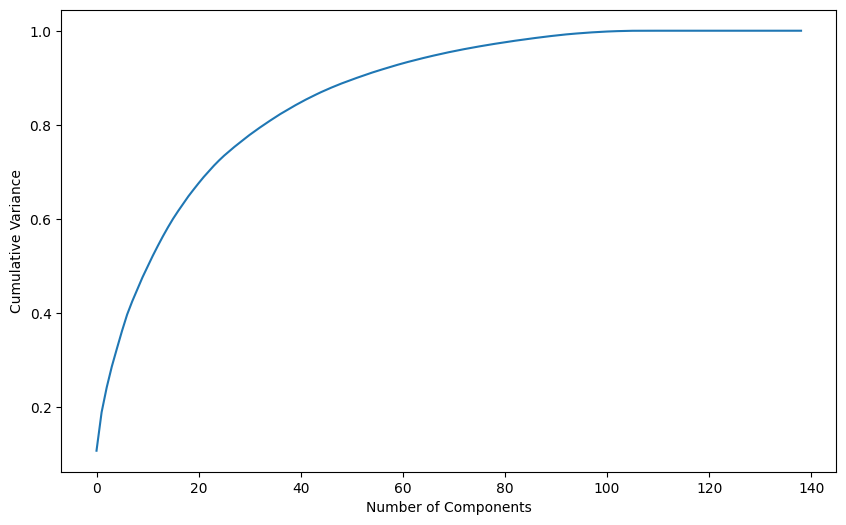

In [159]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that `60 components` explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [160]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [161]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [162]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [163]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [164]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [165]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [166]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [167]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [168]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112330,0.008120,0.001903,0.000089,0.01,{'C': 0.01},0.837624,0.845340,0.846895,0.841291,0.838289,0.841888,0.003701,6,0.843442,0.845995,0.840604,0.842431,0.842758,0.843046,0.001748
1,0.137963,0.031011,0.001803,0.000048,0.1,{'C': 0.1},0.838284,0.846705,0.846895,0.842279,0.838623,0.842557,0.003737,5,0.843275,0.846326,0.842189,0.843768,0.844008,0.843913,0.001359
2,0.175281,0.031626,0.002233,0.000642,1,{'C': 1},0.836964,0.848754,0.847559,0.842608,0.839292,0.843035,0.004566,1,0.843358,0.847403,0.842606,0.844103,0.843841,0.844262,0.001651
3,0.201455,0.046152,0.001957,0.000343,10,{'C': 10},0.836304,0.848412,0.847891,0.842608,0.839626,0.842968,0.004682,4,0.843108,0.847154,0.842522,0.843935,0.843841,0.844112,0.001606
4,0.181270,0.037960,0.002075,0.000668,100,{'C': 100},0.836304,0.848412,0.847891,0.842608,0.839960,0.843035,0.004636,2,0.843108,0.847071,0.842522,0.843852,0.843924,0.844096,0.001575
5,0.250305,0.062396,0.002407,0.000290,1000,{'C': 1000},0.836304,0.848412,0.847891,0.842608,0.839960,0.843035,0.004636,2,0.843024,0.847154,0.842606,0.843852,0.843841,0.844095,0.001603


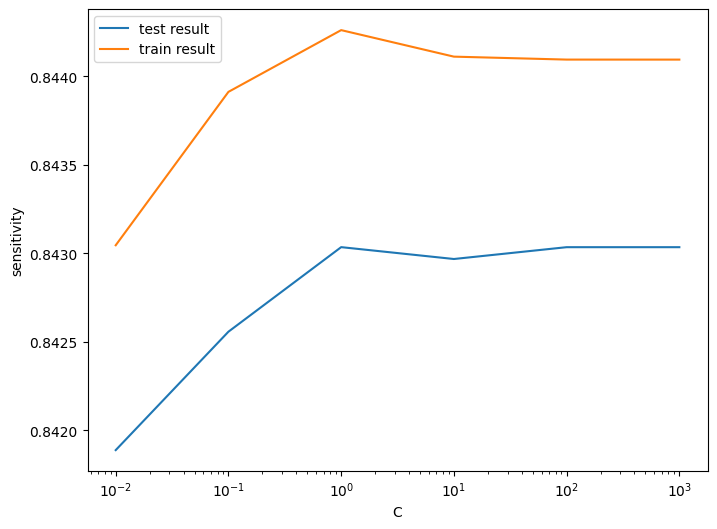

In [169]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [170]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8430352010109443 at C = 1


#### Logistic regression with optimal C

In [171]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [172]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [173]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [174]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11905  3095]
 [ 2343 12657]]


In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8187333333333333
Sensitivity:- 0.8438
Specificity:- 0.7936666666666666


##### Prediction on the test set

In [177]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [183]:
y_test=y_test.astype('int')

In [184]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[2974  758]
 [  43  226]]


In [185]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [186]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7998000499875031
Sensitivity:- 0.8401486988847584
Specificity:- 0.7968917470525188


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

### Final conclusion with PCA
Classic Logistic regression has the sensitivity was approx 81%. Also we have good accuracy of apporx 83%.

# Without PCA

## Logistic regression with No PCA

In [187]:
##### Importing stats model
import statsmodels.api as sm

In [188]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [189]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [190]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29869
Model Family:                Binomial   Df Model:                          130
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11599.
Date:                Wed, 11 Jan 2023   Deviance:                       23197.
Time:                        20:12:06   Pearson chi2:                 6.10e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4583
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6233      0.048     13.111      0.000       0.530       0.716
id                           0.0005      0.017      0.033      0.974      -0.033       0.034
loc_og_t2o_mou           -9.587e-08   4.07e-08     -2.355      0.019   -1.76e-07   -1.61e-08
std_og_t2o_mou           -1.407e-09   8.32e-08     -0.017      0.987   -1.65e-07    1.62e-07
loc_ic_t2o_mou            3.357e-08   8.11e-08      0.414      0.679   -1.25e-07    1.93e-07
arpu_6                       0.0201      0.070      0.289      0.773      -0.116       0.157
arpu_7                       0.5797      0.075      7.707      0.000       0.432       0.727
arpu_8                       1.0743      0.090     11.965      0.000       0.898       1.250
onnet_mou_6                  1.5890      2.821      0.563      0.573      -3.940       7.118
onnet_mou_7                  1.6971      1.969      0.862      0.389      -2.163       5.557
onnet_mou_8                 -1.6374      1.434     -1.142      0.253      -4.447       1.173
offnet_mou_6                 3.3455      2.809      1.191      0.234      -2.161       8.852
offnet_mou_7                 1.3906      1.854      0.750      0.453      -2.243       5.024
offnet_mou_8                -3.3101      1.355     -2.443      0.015      -5.965      -0.655
roam_ic_mou_6                0.0167      0.028      0.598      0.550      -0.038       0.071
roam_ic_mou_7                0.0663      0.036      1.821      0.069      -0.005       0.138
roam_ic_mou_8               -0.0099      0.028     -0.349      0.727      -0.066       0.046
roam_og_mou_6               -0.6714      0.806     -0.833      0.405      -2.251       0.908
roam_og_mou_7               -0.2141      0.451     -0.475      0.635      -1.098       0.670
roam_og_mou_8                0.7559      0.366      2.063      0.039       0.038       1.474
loc_og_t2t_mou_6          -439.9341    642.929     -0.684      0.494   -1700.052     820.184
loc_og_t2t_mou_7         -1197.7578    681.223     -1.758      0.079   -2532.931     137.415
loc_og_t2t_mou_8          6442.3655    594.764     10.832      0.000    5276.649    7608.082
loc_og_t2m_mou_6          -456.3278    665.671     -0.686      0.493   -1761.019     848.364
loc_og_t2m_mou_7         -1147.3427    652.581     -1.758      0.079   -2426.379     131.694
loc_og_t2m_mou_8          6647.5919    613.658     10.833      0.000    5444.844    7850.339
loc_og_t2f_mou_6           -37.4870     54.929     -0.682      0.495    -145.145      70.171
loc_og_t2f_mou_7           -95.4023     54.187     -1.761      0.078    -201.608      10.803
loc_og_t2f_mou_8           544.3567     50.248     10.833      0.000     445.872     642.842
loc_og_t2c_mou_6            -0.0193      0.022     -0.888      0.375      -0.062       0.023
loc_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [200]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [201]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [204]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_7',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8',
       'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'ic_others_6', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6',

### Model-1 with RFE selected columns

In [205]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29930
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12022.
Date:                Wed, 11 Jan 2023   Deviance:                       24044.
Time:                        21:49:32   Pearson chi2:                 8.50e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4428
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5329      0.044     12.201      0.000       0.447       0.619
arpu_6                       0.1443      0.065      2.207      0.027       0.016       0.272
arpu_7                       0.7116      0.070     10.223      0.000       0.575       0.848
arpu_8                       0.9864      0.086     11.444      0.000       0.817       1.155
onnet_mou_6                 -0.6124      0.165     -3.703      0.000      -0.937      -0.288
onnet_mou_7                  0.1441      0.113      1.277      0.202      -0.077       0.365
onnet_mou_8                 -1.3614      1.193     -1.141      0.254      -3.699       0.976
offnet_mou_6                 0.7456      0.152      4.902      0.000       0.447       1.044
offnet_mou_8                -2.9381      1.122     -2.618      0.009      -5.138      -0.738
roam_ic_mou_7                0.1159      0.030      3.845      0.000       0.057       0.175
roam_og_mou_7                0.1546      0.037      4.163      0.000       0.082       0.227
roam_og_mou_8                0.7335      0.303      2.417      0.016       0.139       1.328
loc_og_t2t_mou_6             0.3725      0.070      5.326      0.000       0.235       0.510
loc_og_t2t_mou_8            -0.4464      0.149     -2.998      0.003      -0.738      -0.155
loc_og_t2m_mou_6            -0.3041      0.067     -4.562      0.000      -0.435      -0.173
loc_og_t2f_mou_6             0.1723      0.035      4.860      0.000       0.103       0.242
loc_og_t2f_mou_7            -0.1505      0.038     -3.914      0.000      -0.226      -0.075
loc_og_t2c_mou_8             0.1272      0.021      5.939      0.000       0.085       0.169
loc_og_mou_8                -1.2375      0.292     -4.243      0.000      -1.809      -0.666
std_og_t2t_mou_6             0.6759      0.152      4.446      0.000       0.378       0.974
std_og_t2t_mou_8             2.5051      1.134      2.209      0.027       0.283       4.727
std_og_t2m_mou_6            -0.6651      0.138     -4.832      0.000      -0.935      -0.395
std_og_t2m_mou_7             0.1154      0.116      0.998      0.318      -0.111       0.342
std_og_t2m_mou_8             3.7587      1.032      3.641      0.000       1.736       5.782
std_og_mou_7                 0.3101      0.155      2.005      0.045       0.007       0.613
std_og_mou_8                -6.8013      1.643     -4.140      0.000     -10.021      -3.581
spl_og_mou_8                -0.2264      0.041     -5.481      0.000      -0.307      -0.145
og_others_6                 -0.1119      0.019     -5.765      0.000      -0.150      -0.074
og_others_7                 -1.0728      0.679     -1.580      0.114      -2.404       0.258
og_others_8                 -1.7667      0.984     -1.795      0.073      -3.696       0.163
total_og_mou_8

#### Checking VIFs

In [206]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,total_og_mou_8,7260.07
24,std_og_mou_8,4872.27
5,onnet_mou_8,3080.43
7,offnet_mou_8,2665.64
19,std_og_t2t_mou_8,1946.91
...,...,...
26,og_others_6,1.18
27,og_others_7,1.07
45,spl_ic_mou_8,1.04
44,spl_ic_mou_7,1.02


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [208]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'ic_others_6', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_

### Model-2
Building the model after removing og_others_8 variable.

In [209]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29931
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12027.
Date:                Wed, 11 Jan 2023   Deviance:                       24054.
Time:                        21:49:41   Pearson chi2:                 8.55e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4426
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5504      0.042     13.210      0.000       0.469       0.632
arpu_6                       0.1425      0.065      2.180      0.029       0.014       0.271
arpu_7                       0.7102      0.070     10.202      0.000       0.574       0.847
arpu_8                       0.9895      0.086     11.480      0.000       0.821       1.158
onnet_mou_6                 -0.6112      0.165     -3.695      0.000      -0.935      -0.287
onnet_mou_7                  0.1501      0.113      1.331      0.183      -0.071       0.371
onnet_mou_8                 -1.1269      1.181     -0.954      0.340      -3.442       1.188
offnet_mou_6                 0.7489      0.152      4.920      0.000       0.451       1.047
offnet_mou_8                -2.7087      1.111     -2.439      0.015      -4.885      -0.532
roam_ic_mou_7                0.1166      0.030      3.863      0.000       0.057       0.176
roam_og_mou_7                0.1540      0.037      4.148      0.000       0.081       0.227
roam_og_mou_8                0.6714      0.300      2.236      0.025       0.083       1.260
loc_og_t2t_mou_6             0.3729      0.070      5.331      0.000       0.236       0.510
loc_og_t2t_mou_8            -0.4496      0.149     -3.021      0.003      -0.741      -0.158
loc_og_t2m_mou_6            -0.3057      0.067     -4.582      0.000      -0.436      -0.175
loc_og_t2f_mou_6             0.1718      0.036      4.840      0.000       0.102       0.241
loc_og_t2f_mou_7            -0.1524      0.039     -3.955      0.000      -0.228      -0.077
loc_og_t2c_mou_8             0.1257      0.021      5.873      0.000       0.084       0.168
loc_og_mou_8                -1.2203      0.292     -4.185      0.000      -1.792      -0.649
std_og_t2t_mou_6             0.6763      0.152      4.448      0.000       0.378       0.974
std_og_t2t_mou_8             2.4970      1.134      2.203      0.028       0.275       4.719
std_og_t2m_mou_6            -0.6669      0.138     -4.842      0.000      -0.937      -0.397
std_og_t2m_mou_7             0.1206      0.115      1.045      0.296      -0.106       0.347
std_og_t2m_mou_8             3.7491      1.032      3.633      0.000       1.726       5.772
std_og_mou_7                 0.3032      0.155      1.962      0.050       0.000       0.606
std_og_mou_8                -6.7568      1.642     -4.114      0.000      -9.976      -3.538
spl_og_mou_8                -0.2229      0.041     -5.420      0.000      -0.304      -0.142
og_others_6                 -0.1129      0.019     -5.839      0.000      -0.151      -0.075
og_others_7                 -1.4082      0.663     -2.123      0.034      -2.709      -0.108
total_og_mou_8               4.5743      1.734      2.638      0.008       1.176       7.972
loc_ic_t2t_mou

#### Checking VIF for Model-2

In [210]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,total_og_mou_8,6548.74
24,std_og_mou_8,4853.51
5,onnet_mou_8,2868.69
7,offnet_mou_8,2471.78
19,std_og_t2t_mou_8,1946.87
...,...,...
26,og_others_6,1.16
44,spl_ic_mou_8,1.04
43,spl_ic_mou_7,1.02
45,ic_others_6,1.01


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [211]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [212]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29932
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12030.
Date:                Wed, 11 Jan 2023   Deviance:                       24059.
Time:                        21:49:50   Pearson chi2:                 8.58e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4425
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5487      0.042     13.177      0.000       0.467       0.630
arpu_6                       0.1313      0.065      2.014      0.044       0.004       0.259
arpu_7                       0.7023      0.070     10.103      0.000       0.566       0.838
arpu_8                       0.9894      0.086     11.469      0.000       0.820       1.159
onnet_mou_6                 -0.6082      0.165     -3.679      0.000      -0.932      -0.284
onnet_mou_7                  0.1506      0.113      1.335      0.182      -0.070       0.372
onnet_mou_8                  1.6617      0.304      5.474      0.000       1.067       2.257
offnet_mou_6                 0.7521      0.152      4.950      0.000       0.454       1.050
roam_ic_mou_7                0.1178      0.030      3.895      0.000       0.059       0.177
roam_og_mou_7                0.1552      0.037      4.177      0.000       0.082       0.228
roam_og_mou_8               -0.0553      0.039     -1.404      0.160      -0.132       0.022
loc_og_t2t_mou_6             0.3717      0.070      5.316      0.000       0.235       0.509
loc_og_t2t_mou_8            -0.4424      0.149     -2.978      0.003      -0.734      -0.151
loc_og_t2m_mou_6            -0.3057      0.067     -4.591      0.000      -0.436      -0.175
loc_og_t2f_mou_6             0.1725      0.035      4.869      0.000       0.103       0.242
loc_og_t2f_mou_7            -0.1538      0.038     -3.996      0.000      -0.229      -0.078
loc_og_t2c_mou_8             0.1159      0.021      5.494      0.000       0.075       0.157
loc_og_mou_8                -1.2930      0.288     -4.495      0.000      -1.857      -0.729
std_og_t2t_mou_6             0.6777      0.152      4.459      0.000       0.380       0.976
std_og_t2t_mou_8             2.4460      1.127      2.171      0.030       0.237       4.655
std_og_t2m_mou_6            -0.6700      0.137     -4.876      0.000      -0.939      -0.401
std_og_t2m_mou_7             0.1248      0.115      1.081      0.280      -0.101       0.351
std_og_t2m_mou_8             3.6972      1.026      3.605      0.000       1.687       5.707
std_og_mou_7                 0.3004      0.154      1.945      0.052      -0.002       0.603
std_og_mou_8                -6.8004      1.631     -4.169      0.000      -9.998      -3.603
spl_og_mou_8                -0.1904      0.039     -4.932      0.000      -0.266      -0.115
og_others_6                 -0.1075      0.019     -5.582      0.000      -0.145      -0.070
og_others_7                 -1.4079      0.663     -2.124      0.034      -2.707      -0.109
total_og_mou_8               0.6020      0.593      1.015      0.310      -0.560       1.764
loc_ic_t2t_mou_7             0.3450      0.153      2.252      0.024       0.045       0.645
loc_ic_t2t_mou

#### VIF Model-3

In [213]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,std_og_mou_8,4832.98
18,std_og_t2t_mou_8,1946.72
27,total_og_mou_8,1670.96
21,std_og_t2m_mou_8,1569.03
16,loc_og_mou_8,379.61
...,...,...
25,og_others_6,1.14
43,spl_ic_mou_8,1.04
42,spl_ic_mou_7,1.02
44,ic_others_6,1.01


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

###  Model performance on the train set

In [214]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.034763
1    0.114934
2    0.057632
3    0.162253
4    0.004567
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [215]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.034763,0
1,0,0.114934,1
2,0,0.057632,2
3,0,0.162253,3
4,0,0.004567,4


##### Finding Optimal Probablity Cutoff Point

In [216]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034763,0,1,0,0,0,0,0,0,0,0,0
1,0,0.114934,1,1,1,0,0,0,0,0,0,0,0
2,0,0.057632,2,1,0,0,0,0,0,0,0,0,0
3,0,0.162253,3,1,1,0,0,0,0,0,0,0,0
4,0,0.004567,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [376]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.703667     0.978000     0.429333
0.2          0.2  0.762767     0.959867     0.565667
0.3          0.3  0.802100     0.939400     0.664800
0.4          0.4  0.826633     0.909933     0.743333
0.5          0.5  0.837267     0.867133     0.807400
0.6          0.6  0.834567     0.808800     0.860333
0.7          0.7  0.813667     0.718667     0.908667
0.8          0.8  0.746600     0.548067     0.945133
0.9          0.9  0.618633     0.261133     0.976133


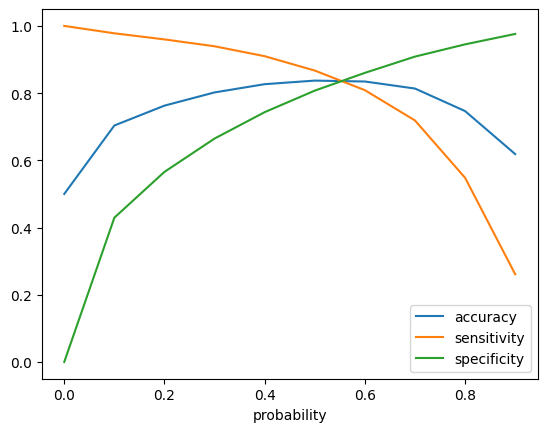

In [377]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.6` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [378]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.034763,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.114934,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.057632,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.162253,3,1,1,0,0,0,0,0,0,0,0,0
4,0,0.004567,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [379]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[12111  2889]
 [ 1993 13007]]


In [380]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [381]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8372666666666667
Sensitivity:- 0.8671333333333333
Specificity:- 0.8074


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [382]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

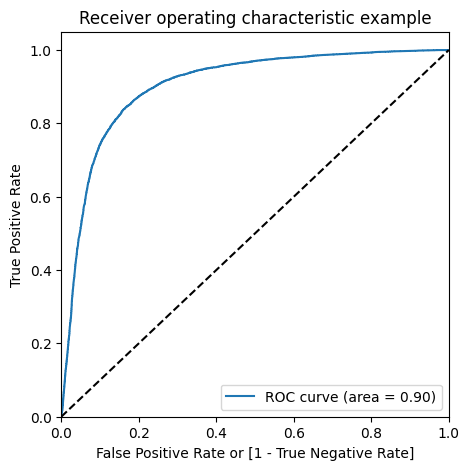

In [383]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [384]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [385]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [386]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [387]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [388]:
y_test_pred.head()

58165    0.010207
603      0.009591
28696    0.000264
34825    0.001590
17757    0.015976
dtype: float64

In [389]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
58165,0.010207
603,0.009591
28696,0.000264
34825,0.001590
17757,0.015976


In [390]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
58165,0
603,0
28696,0
34825,0
17757,0


In [391]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [392]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [393]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [394]:
y_test_pred_final.head()

,churn_probability,CustID,0
0,0,58165,0.010207
1,0,603,0.009591
2,0,28696,0.000264
3,0,34825,0.001590
4,0,17757,0.015976


In [395]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [396]:
y_test_pred_final

,churn_probability,CustID,churn_prob
0,0,58165,0.010207
1,0,603,0.009591
2,0,28696,0.000264
3,0,34825,0.001590
4,0,17757,0.015976
...,...,...,...
3996,0,27278,0.020356
3997,0,3592,0.194314
3998,0,49896,0.016731
3999,1,37709,0.886858


In [408]:
# Rearranging the columns
#y_test_pred_final = y_test_pred_final.reindex(['CustID','churn_probabiliy','churn_prob'] ,axis=1)

In [409]:
y_test_pred_final.head()

,churn_probability,CustID,churn_prob,test_predicted
0,0,58165,0.010207,0
1,0,603,0.009591,0
2,0,28696,0.000264,0
3,0,34825,0.001590,0
4,0,17757,0.015976,0


In [402]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [375]:
y_test_pred_final.head()

,CustID,churn_probabiliy,churn_prob,test_predicted
0,58165,NaN,0.010207,0
1,603,NaN,0.009591,0
2,28696,NaN,0.000264,0
3,34825,NaN,0.001590,0
4,17757,NaN,0.015976,0


In [403]:
y_test_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   churn_probability  4001 non-null   int64  
 1   CustID             4001 non-null   int64  
 2   churn_prob         4001 non-null   float64
 3   test_predicted     4001 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 125.2 KB


##### Metrics

In [405]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted'])
print(confusion)

[[3008  724]
 [  57  212]]


In [406]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [407]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.804798800299925
Sensitivity:- 0.7881040892193308
Specificity:- 0.8060021436227224


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## Business recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

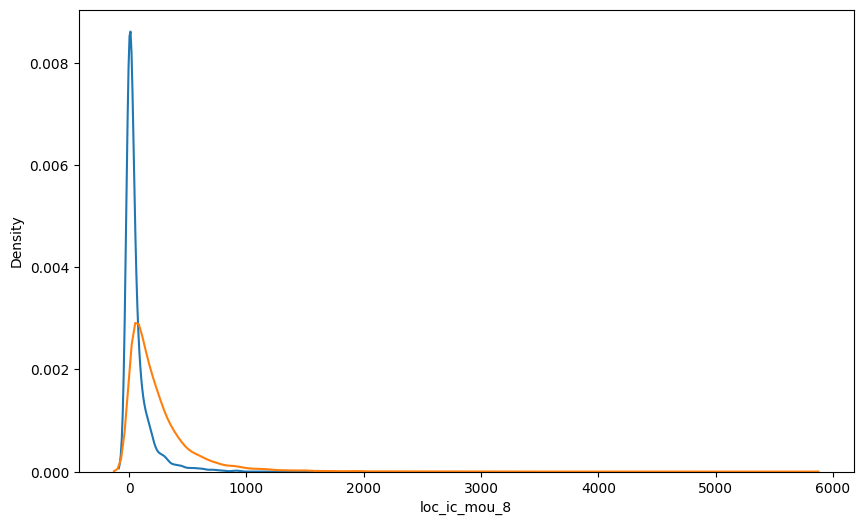

In [410]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

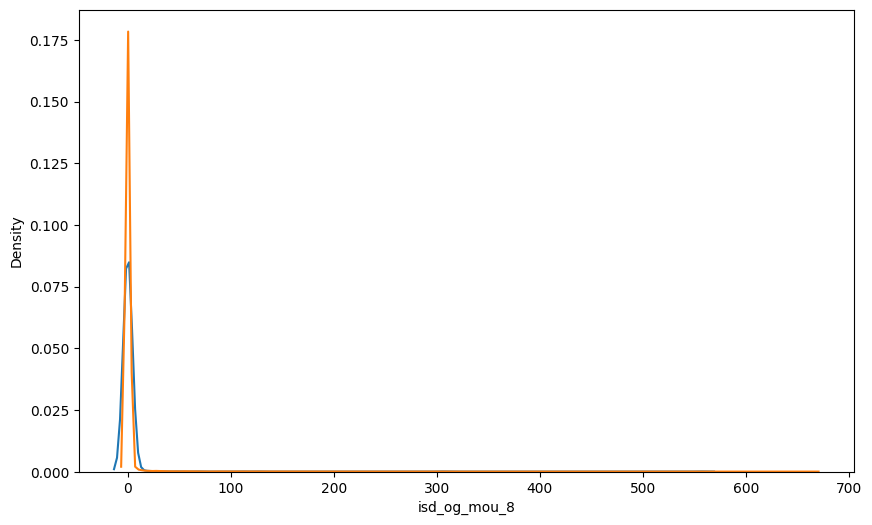

In [411]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

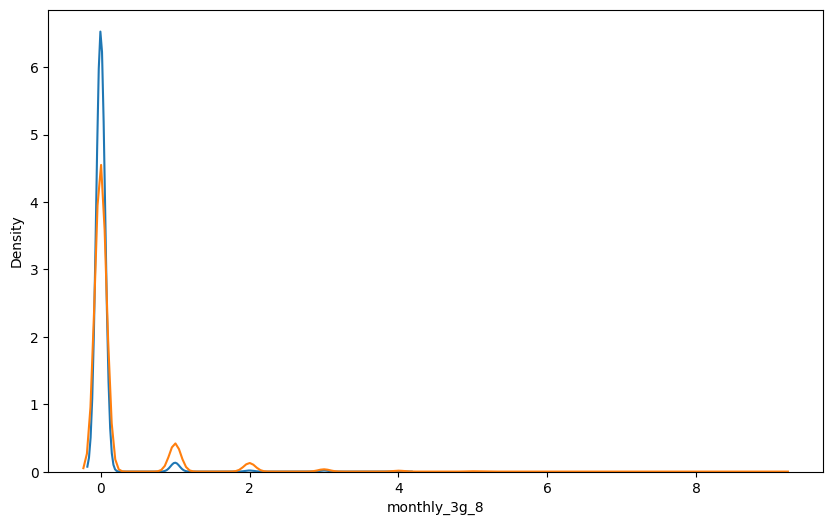

In [412]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.